In [1]:
# Import library
import pandas as pd
import numpy as np
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
from datetime import datetime



```
## Analisis Customer Segmentation
```



In [3]:
#connwcr to file in googke drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Memuat data penjualan

sales_data = pd.read_csv('/content/drive/MyDrive/Data Inixindo/FactResellerSales.txt', sep='|')
sales_data.head()

,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,ResellerKey,EmployeeKey,PromotionKey,CurrencyKey,SalesTerritoryKey,SalesOrderNumber,...,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,CarrierTrackingNumber,CustomerPONumber,OrderDate,DueDate,ShipDate
0,349,20101229,20110110,20110105,676,285,1,100,5,SO43659,...,1898.0944,1898.0944,2024.994,161.9995,50.6249,4911-403C-98,PO522145787,2010-12-29 00:00:00,2011-01-10 00:00:00,2011-01-05 00:00:00
1,350,20101229,20110110,20110105,676,285,1,100,5,SO43659,...,1898.0944,5694.2832,6074.982,485.9986,151.8746,4911-403C-98,PO522145787,2010-12-29 00:00:00,2011-01-10 00:00:00,2011-01-05 00:00:00
2,351,20101229,20110110,20110105,676,285,1,100,5,SO43659,...,1898.0944,1898.0944,2024.994,161.9995,50.6249,4911-403C-98,PO522145787,2010-12-29 00:00:00,2011-01-10 00:00:00,2011-01-05 00:00:00
3,344,20101229,20110110,20110105,676,285,1,100,5,SO43659,...,1912.1544,1912.1544,2039.994,163.1995,50.9999,4911-403C-98,PO522145787,2010-12-29 00:00:00,2011-01-10 00:00:00,2011-01-05 00:00:00
4,345,20101229,20110110,20110105,676,285,1,100,5,SO43659,...,1912.1544,1912.1544,2039.994,163.1995,50.9999,4911-403C-98,PO522145787,2010-12-29 00:00:00,2011-01-10 00:00:00,2011-01-05 00:00:00


In [ ]:
import pandas as pd

# Memuat data penjualan

reseller_data = pd.read_csv('/content/drive/MyDrive/Data Inixindo/Reseller.csv', sep='|')
reseller_data.head()

,ResellerKey,GeographyKey,ResellerAlternateKey,Phone,BusinessType,ResellerName,NumberEmployees,OrderFrequency,OrderMonth,FirstOrderYear,LastOrderYear,ProductLine,AddressLine1,AddressLine2,AnnualSales,BankName,MinPaymentType,MinPaymentAmount,AnnualRevenue,YearOpened
0,1,637,AW00000001,245-555-0173,Value Added Reseller,A Bike Store,2,S,5.0,2011.0,2011.0,Road,2251 Elliot Avenue,NaN,300000,International Bank,NaN,NaN,30000,1974
1,2,635,AW00000002,170-555-0127,Specialty Bike Shop,Progressive Sports,10,A,5.0,2012.0,2013.0,Mountain,3207 S Grady Way,NaN,800000,International Security,1.0,NaN,80000,1976
2,3,584,AW00000003,279-555-0130,Warehouse,Advanced Bike Components,40,Q,6.0,2011.0,2013.0,Road,12345 Sterling Avenue,NaN,1500000,Primary International,2.0,NaN,150000,1978
3,4,572,AW00000004,710-555-0173,Value Added Reseller,Modular Cycle Systems,5,S,4.0,2011.0,2013.0,Road,800 Interchange Blvd.,Suite 2501,300000,United Security,3.0,600.0,30000,1980
4,5,322,AW00000005,828-555-0186,Specialty Bike Shop,Metropolitan Sports Supply,13,A,6.0,2012.0,2013.0,Road,482505 Warm Springs Blvd.,NaN,800000,Primary Bank & Reserve,NaN,NaN,80000,1982


In [ ]:
# Menampilkan informasi data
sales_data.info()

# Menghilangkan kolom yang tidak diperlukan
sales_data = sales_data[['ResellerKey', 'SalesAmount']]

# Menggabungkan data dengan informasi reseller
sales_data = pd.merge(sales_data, reseller_data[['ResellerKey', 'ResellerName']], on='ResellerKey', how='left')

# Menghilangkan data yang kosong
sales_data.dropna(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60855 entries, 0 to 60854
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ProductKey             60855 non-null  int64  
 1   OrderDateKey           60855 non-null  int64  
 2   DueDateKey             60855 non-null  int64  
 3   ShipDateKey            60855 non-null  int64  
 4   ResellerKey            60855 non-null  int64  
 5   EmployeeKey            60855 non-null  int64  
 6   PromotionKey           60855 non-null  int64  
 7   CurrencyKey            60855 non-null  int64  
 8   SalesTerritoryKey      60855 non-null  int64  
 9   SalesOrderNumber       60855 non-null  object 
 10  SalesOrderLineNumber   60855 non-null  int64  
 11  RevisionNumber         60855 non-null  int64  
 12  OrderQuantity          60855 non-null  int64  
 13  UnitPrice              60855 non-null  float64
 14  ExtendedAmount         60855 non-null  float64
 15  Un

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


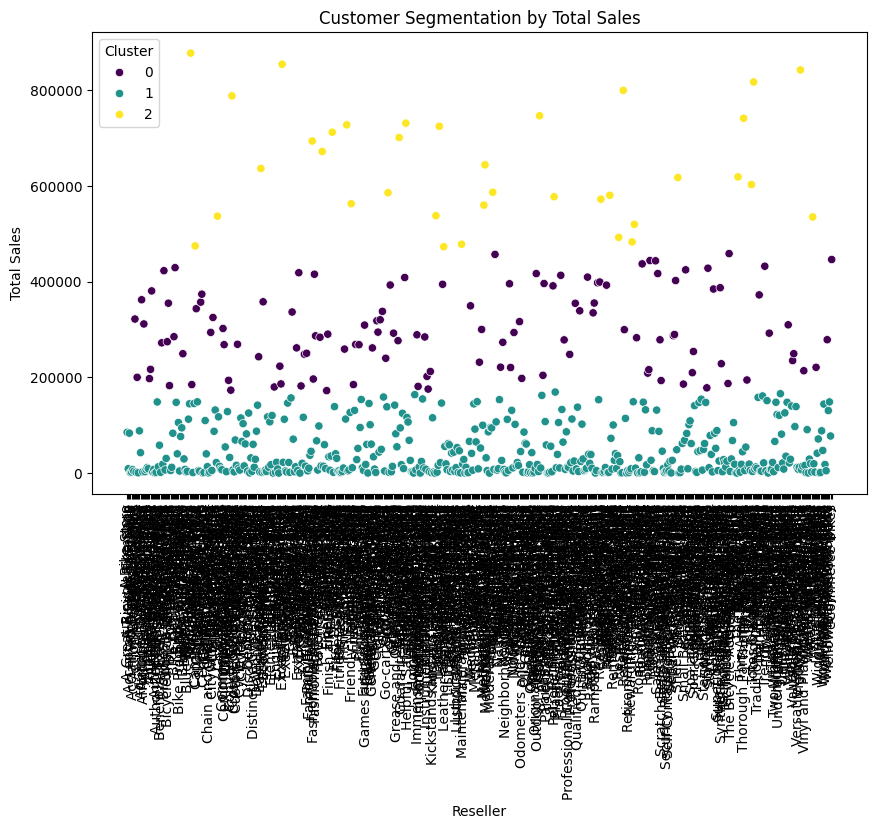

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Mengelompokkan pelanggan dengan K-Means
X = sales_data.groupby('ResellerName')['SalesAmount'].sum().reset_index()
scaler = StandardScaler()
X['SalesAmountScaled'] = scaler.fit_transform(X[['SalesAmount']])
kmeans = KMeans(n_clusters=3, random_state=42)
X['Cluster'] = kmeans.fit_predict(X[['SalesAmountScaled']])

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X, x='ResellerName', y='SalesAmount', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation by Total Sales')
plt.xticks(rotation=90)
plt.xlabel('Reseller')
plt.ylabel('Total Sales')
plt.show()


3. Kesimpulan
Berdasarkan analisis customer segmentation, kita dapat mengidentifikasi tiga kelompok pelanggan berdasarkan total pembelian mereka:

*   Cluster 0: Pelanggan dengan total pembelian rendah
*   Cluster 1: Pelanggan dengan total pembelian menengah
*   Cluster 2: Pelanggan dengan total pembelian tinggi

**Kesimpulan:**

Pelanggan pada Cluster 2 merupakan pelanggan yang berpotensi menjadi sumber pendapatan yang signifikan bagi perusahaan.
Pelanggan pada Cluster 0 mungkin memerlukan strategi pemasaran khusus untuk meningkatkan aktivitas pembelian mereka.
Penawaran promosi atau program loyalitas dapat ditargetkan kepada pelanggan pada Cluster 1 untuk meningkatkan nilai belanja mereka.

#

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Memuat data
product = pd.read_csv('/content/drive/MyDrive/Data Inixindo/Product.txt', delimiter='|', encoding='latin1')
product.head()

,ProductKey,ProductAlternateKey,ProductSubcategoryKey,WeightUnitMeasureCode,SizeUnitMeasureCode,EnglishProductName,SpanishProductName,FrenchProductName,StandardCost,FinishedGoodsFlag,...,ChineseDescription,ArabicDescription,HebrewDescription,ThaiDescription,GermanDescription,JapaneseDescription,TurkishDescription,StartDate,EndDate,Status
0,1,AR-5381,NaN,NaN,NaN,Adjustable Race,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-07-01 00:00:00,NaN,Current
1,2,BA-8327,NaN,NaN,NaN,Bearing Ball,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-07-01 00:00:00,NaN,Current
2,3,BE-2349,NaN,NaN,NaN,BB Ball Bearing,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-07-01 00:00:00,NaN,Current
3,4,BE-2908,NaN,NaN,NaN,Headset Ball Bearings,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-07-01 00:00:00,NaN,Current
4,5,BL-2036,NaN,NaN,NaN,Blade,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-07-01 00:00:00,NaN,Current


In [ ]:
# Check the column names and data types
print("Column names in sales_data:", sales_data.columns)
print("Column names in product:", product.columns)

# Check the data types
print("Data types in sales_data:", sales_data.dtypes)
print("Data types in product:", product.dtypes)

Column names in sales_data: Index(['ProductKey', 'OrderDateKey', 'DueDateKey', 'ShipDateKey',
       'ResellerKey', 'EmployeeKey', 'PromotionKey', 'CurrencyKey',
       'SalesTerritoryKey', 'SalesOrderNumber', 'SalesOrderLineNumber',
       'RevisionNumber', 'OrderQuantity', 'UnitPrice', 'ExtendedAmount',
       'UnitPriceDiscountPct', 'DiscountAmount', 'ProductStandardCost',
       'TotalProductCost', 'SalesAmount', 'TaxAmt', 'Freight',
       'CarrierTrackingNumber', 'CustomerPONumber', 'OrderDate', 'DueDate',
       'ShipDate'],
      dtype='object')
Column names in product: Index(['ProductKey', 'ProductAlternateKey', 'ProductSubcategoryKey',
       'WeightUnitMeasureCode', 'SizeUnitMeasureCode', 'EnglishProductName',
       'SpanishProductName', 'FrenchProductName', 'StandardCost',
       'FinishedGoodsFlag', 'Color', 'SafetyStockLevel', 'ReorderPoint',
       'ListPrice', 'Size', 'SizeRange', 'Weight', 'DaysToManufacture',
       'ProductLine', 'DealerPrice', 'Class', 'Style', 'Mo

In [ ]:
# Convert 'ProductKey' column in 'sales_data' to object type
sales_data['ProductKey'] = sales_data['ProductKey'].astype(str)

# Merge the datasets
merged_data = pd.merge(sales_data, product, on='ProductKey')

In [ ]:
# Rename the column in sales_data to match the column name in product
sales_data.rename(columns={'ProductAlternateKey': 'ProductKey'}, inplace=True)

# Merge the datasets
merged_data = pd.merge(sales_data, product, on='ProductKey')

# Display the merged data
print(merged_data.head())

  ProductKey  OrderDateKey  DueDateKey  ShipDateKey  ResellerKey  EmployeeKey  \
0        349      20101229    20110110     20110105          676          285   
1        349      20101229    20110110     20110105          442          288   
2        349      20101229    20110110     20110105          146          289   
3        349      20101229    20110110     20110105          504          281   
4        349      20101229    20110110     20110105          119          288   

   PromotionKey  CurrencyKey  SalesTerritoryKey SalesOrderNumber  ...  \
0             1          100                  5          SO43659  ...   
1             1           19                  6          SO43661  ...   
2             1          100                  1          SO43665  ...   
3             1          100                  3          SO43670  ...   
4             1           19                  6          SO43672  ...   

   ChineseDescription  ArabicDescription  HebrewDescription  ThaiDescripti

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


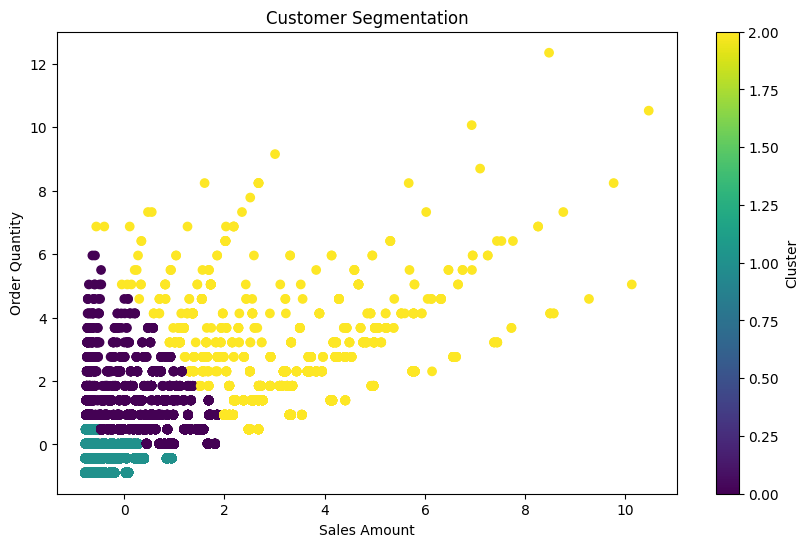

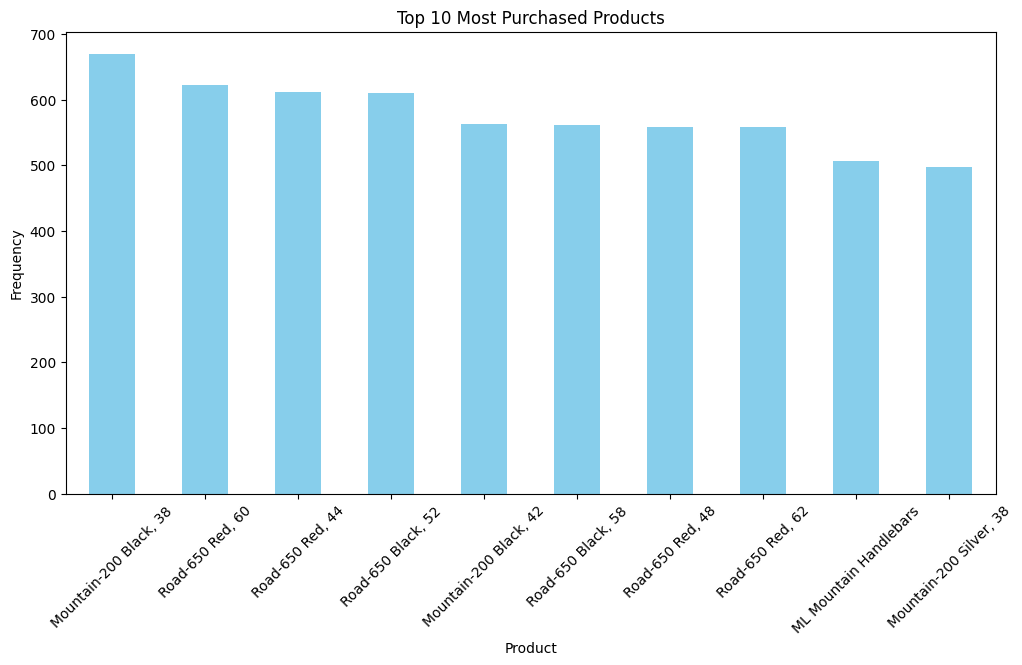

Kesimpulan:
Berdasarkan analisis Customer Segmentation, kita dapat mengidentifikasi tiga kelompok pelanggan:
Cluster 0: Pelanggan dengan total pembelian rendah
Cluster 1: Pelanggan dengan total pembelian menengah
Cluster 2: Pelanggan dengan total pembelian tinggi

Dari visualisasi jenis produk yang sering dibeli, dapat dilihat produk-produk teratas yang diminati pelanggan.


In [ ]:
# Melakukan analisis Customer Segmentation
X = merged_data[['SalesAmount', 'OrderQuantity']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
merged_data['Cluster'] = kmeans.labels_

# Visualisasi Customer Segmentation
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=kmeans.labels_, cmap='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Sales Amount')
plt.ylabel('Order Quantity')
plt.colorbar(label='Cluster')
plt.show()

# Visualisasi jenis produk yang sering dibeli
product_count = merged_data['EnglishProductName'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
product_count.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Purchased Products')
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Kesimpulan
print("Kesimpulan:")
print("Berdasarkan analisis Customer Segmentation, kita dapat mengidentifikasi tiga kelompok pelanggan:")
print("Cluster 0: Pelanggan dengan total pembelian rendah")
print("Cluster 1: Pelanggan dengan total pembelian menengah")
print("Cluster 2: Pelanggan dengan total pembelian tinggi")
print()
print("Dari visualisasi jenis produk yang sering dibeli, dapat dilihat produk-produk teratas yang diminati pelanggan.")


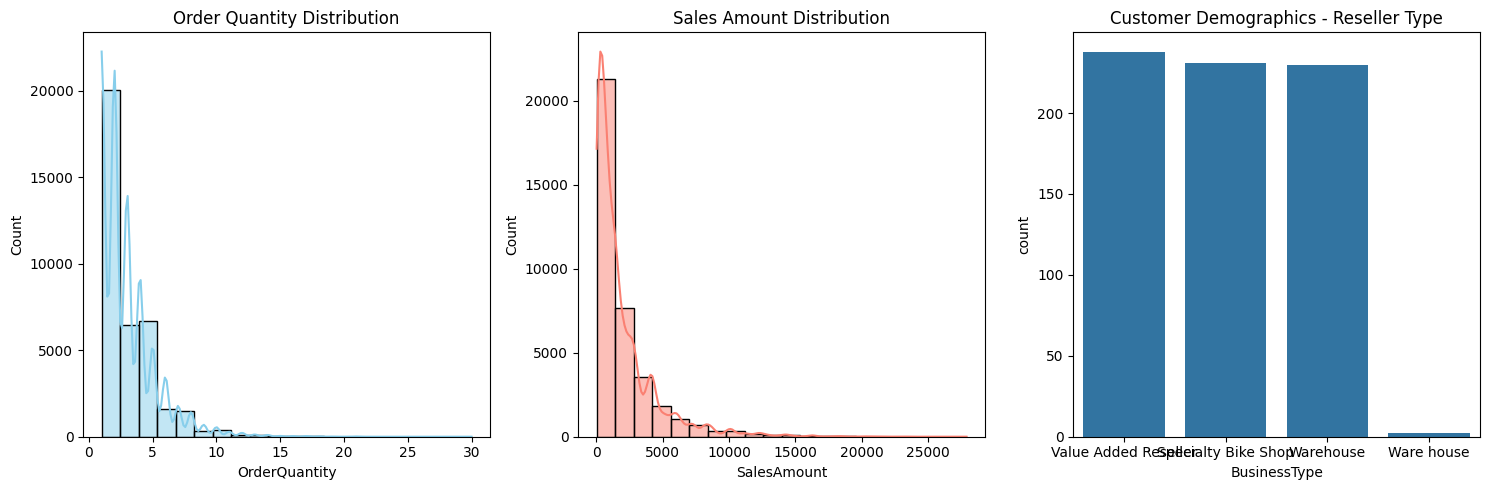

In [ ]:
# Visualize key features for segmentation
plt.figure(figsize=(15, 5))

# Order Quantity Distribution
plt.subplot(1, 3, 1)
sns.histplot(merged_data['OrderQuantity'], bins=20, kde=True, color='skyblue')
plt.title('Order Quantity Distribution')

# Sales Amount Distribution
plt.subplot(1, 3, 2)
sns.histplot(merged_data['SalesAmount'], bins=20, kde=True, color='salmon')
plt.title('Sales Amount Distribution')

# Customer Demographics - Example: ResellerType
plt.subplot(1, 3, 3)
sns.countplot(data=reseller_data, x='BusinessType')
plt.title('Customer Demographics - Reseller Type')

plt.tight_layout()
plt.show()

1.   Order Quantity Distribution
shows how many orders are placed for different quantities.
**Insights:**
Can guide inventory planning and identify opportunities for upselling or bundling products.

2.   Sales Amount  Distribution
helps identify the range and distribution of purchase values.
**Insights:**
aids in setting pricing strategies, identifying outliers, and understanding customer spending habits.

3.   Customer Demography - Reseller Bussiness Type
provides insights into the distribution of customers based on their business types.
**Insights:**
Can gbe used to tailor marketing and sales strategies for different types of reseller.


## Develop More Targeted Marketing Strategies:
Tailor marketing efforts based on insights from customer segments to increase effectiveness.
**Example:** If segmentation shows that Cluster 0 tends to purchase product X, marketing strategies can focus on promoting product X to customers in that segment, while Cluster 2 may be more responsive to promotions for product Y.

## Personalize Customer Experience:
Use customer segmentation insights to personalize interactions and offerings, enhancing customer satisfaction and loyalty.
**Example**: If Cluster 1 frequently purchases product A, they may receive recommendations for similar products when shopping online or special offers tailored to their preferences.

## Optimize Products and Services:
Adjust product offerings and services based on top-purchased products and customer preferences.
**Example:** If data shows that product B is frequently purchased across all segments, the company may decide to increase the stock of product B or develop related product variants

## Develop Appropriate Loyalty Programs:
Design loyalty programs that resonate with different customer segments, encouraging repeat purchases and customer retention.
**Example:** Offering exclusive discounts to loyal customers in Cluster 2, while it may be more effective to offer point rewards or special gifts for every purchase to customers in Cluster 0.
